In [93]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import itertools
import seaborn as sns
from os import walk
from tqdm import tqdm

In [94]:
import json
f = open('/home/mark/Desktop/chromosome_y/json_dict/HG01890_cluster.json') 
T2T_dict = json.load(f) 

In [95]:
T2T_startStopDict = {key:[] for key in T2T_dict.keys()}
for key in T2T_startStopDict.keys():
    T2T_startStopDict[key].append(T2T_dict[key][0][0].split(" ")[6].strip())
    T2T_startStopDict[key].append(T2T_dict[key][-1][-1].split(" ")[7].strip())

In [96]:
T2T_startStopDict

{'0': ['29823871', '29857041'],
 '1': ['30203322', '30295248'],
 '2': ['30645332', '30666368'],
 '3': ['32095446', '32326802'],
 '4': ['33301785', '33575578'],
 '5': ['34296876', '34358917'],
 '6': ['34364640', '34473437'],
 '7': ['35308683', '35545473'],
 '8': ['36090560', '36293831'],
 '9': ['37078637', '37730854'],
 '10': ['38023000', '38416458'],
 '11': ['38847093', '40825752'],
 '12': ['41267031', '41464375'],
 '13': ['41795367', '43443099'],
 '14': ['44387310', '44546472'],
 '15': ['45030984', '45138567'],
 '16': ['45796966', '45822760'],
 '17': ['46041949', '46065018'],
 '18': ['46075790', '46095889'],
 '19': ['46105901', '46127101'],
 '20': ['46133501', '46162589']}

In [97]:
with open('/home/mark/Desktop/chromosome_y/assemblies/repeatmasker/postMay232022/finalized/HG01890_finalized.txt') as f:
    Lines = f.readlines()
    myLines = []
    lineNum = 0

    for line in tqdm(Lines): 
        
        goodLine = ' '.join(line.split())
        
        myLines.append(goodLine)

100%|█████████████████████████████████| 16757/16757 [00:00<00:00, 404491.00it/s]


In [98]:
myLines2 = myLines.copy()
myLines3 = myLines.copy()

In [99]:
NRB_Blocks={}
i = 0
firstFlag = 0
keyList = list(T2T_startStopDict.keys())
myKey = 0

for key in tqdm(keyList):
    
    if firstFlag == 0:
    
        NRB_Blocks[i]=[]

        for line in myLines2:

            if int(line.split(" ")[7].strip()) < int(T2T_startStopDict[key][0].strip()) and int(line.split(" ")[6].strip()) > 28526630:
                NRB_Blocks[i].append(line)
            else:
                continue
                
                
        firstFlag=1
        myKey+=1
                
    else:
        
        NRB_Blocks[i]=[]
    
        for line in myLines2:

            if int(line.split(" ")[7].strip()) < int(T2T_startStopDict[key][0].strip()) and int(line.split(" ")[6].strip()) > int(T2T_startStopDict[keyList[myKey-1]][1].strip()) :
                NRB_Blocks[i].append(line)

            else:
                continue
                
        myKey+=1
        
            
    i+=1
            

100%|███████████████████████████████████████████| 21/21 [00:00<00:00, 63.35it/s]


In [100]:
len(myLines2)

16757

In [101]:
NRB_Blocks.keys()

dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20])

In [11]:
import collections
templist = {}

for block in list(NRB_Blocks.keys())[:-3]:
    for repeat in NRB_Blocks[block]:
        if repeat.split(" ")[11] in templist.keys():
            templist[repeat.split(" ")[11]].append(repeat.split(" ")[10])
        else:
            templist[repeat.split(" ")[11]]=[]
            templist[repeat.split(" ")[11]].append(repeat.split(" ")[10])

In [12]:
templist.keys()

dict_keys(['Simple_repeat', 'Satellite', 'Low_complexity'])

In [13]:
print(collections.Counter(templist['Satellite']))

Counter({'HSATII': 4055, '(GAATG)n': 156, '(CATTC)n': 84, 'SAR': 3, 'HSATI': 1})


In [14]:
4512/(4512+161+84+3+1)

0.9477000630119723

In [15]:
spacerBlockLengths=[]
for block in list(NRB_Blocks.keys())[:-3]:
    spacerBlockLengths.append((int(NRB_Blocks[block][-1].split(" ")[7].strip())- int(NRB_Blocks[block][0].split(" ")[6].strip()))+1)
print(np.median(spacerBlockLengths))

514796.0


In [16]:
i=0
tempList = []
for block in spacerBlockLengths:
    tempList.append([i,block,'Spacer Block'])
    tempList.append([i,int(T2T_startStopDict[str(i)][1])-int(T2T_startStopDict[str(i)][0]),'Repeat Block'])
    i+=1
    
tempDF = pd.DataFrame(data=tempList, columns=['Block_Number','Length','Block_Type'])

In [17]:
import scipy
scipy.stats.mannwhitneyu(list(tempDF[tempDF['Block_Type']=='Spacer Block']['Length']), list(tempDF[tempDF['Block_Type']=='Repeat Block']['Length']))

MannwhitneyuResult(statistic=255.0, pvalue=0.0034272183334826574)

In [18]:
print(np.median(list(tempDF[tempDF['Block_Type']=='Spacer Block']['Length'])))

514796.0


In [19]:
print(np.median(list(tempDF[tempDF['Block_Type']=='Repeat Block']['Length'])))

178253.0


In [20]:
tempDF['SampleName']='HG01890'

In [20]:
#tempDF.to_csv("/home/mark/Desktop/chromosome_y/Dataframes/HG01890/BlockSize_dataframe.csv")

In [22]:
#Make a file with the coordinates for DYZ1 blocks
with open("/home/mark/Desktop/chromosome_y/nonRepeatBlockSubBlocks/HG01890/HG01890_spacerBlock_DYZ1_regions.tsv", 'a+') as file:
    for key in NRB_Blocks.keys():
        file.write(str(key)+"\t"+str(NRB_Blocks[key][0].split(" ")[5])+"\t"+str(NRB_Blocks[key][0].split(" ")[6])+"\t"+str(NRB_Blocks[key][-1].split(" ")[7])+"\n")
    file.close()

In [23]:
#Make a file with the coordinates for DYZ1 blocks
with open("/home/mark/Desktop/chromosome_y/nonRepeatBlockSubBlocks/HG01890/HG01890_spacerBlock_DYZ1_regions_samtools.tsv", 'a+') as file:
    for key in NRB_Blocks.keys():
        file.write(str(NRB_Blocks[key][0].split(" ")[5])+":"+str(NRB_Blocks[key][0].split(" ")[6])+"-"+str(NRB_Blocks[key][-1].split(" ")[7])+"\n")
    file.close()

## Load in HaeIII Results

In [31]:
spacerDictionary = {}
for key in NRB_Blocks.keys():
    spacerDictionary[str(NRB_Blocks[key][0].split(" ")[5])+":"+str(NRB_Blocks[key][0].split(" ")[6])+"-"+str(NRB_Blocks[key][-1].split(" ")[7])]=key

In [91]:
spacerDictionary

{'chrY.01-24.01.PAR1-PAR2.RV.unassigned-0000376.HG01890:28526907-29823870': 0,
 'chrY.01-24.01.PAR1-PAR2.RV.unassigned-0000376.HG01890:29857042-30203318': 1,
 'chrY.01-24.01.PAR1-PAR2.RV.unassigned-0000376.HG01890:30295250-30645330': 2,
 'chrY.01-24.01.PAR1-PAR2.RV.unassigned-0000376.HG01890:30666370-32095444': 3,
 'chrY.01-24.01.PAR1-PAR2.RV.unassigned-0000376.HG01890:32326804-33301783': 4,
 'chrY.01-24.01.PAR1-PAR2.RV.unassigned-0000376.HG01890:33575580-34296853': 5,
 'chrY.01-24.01.PAR1-PAR2.RV.unassigned-0000376.HG01890:34359232-34364632': 6,
 'chrY.01-24.01.PAR1-PAR2.RV.unassigned-0000376.HG01890:34473439-35308681': 7,
 'chrY.01-24.01.PAR1-PAR2.RV.unassigned-0000376.HG01890:35545475-36090558': 8,
 'chrY.01-24.01.PAR1-PAR2.RV.unassigned-0000376.HG01890:36293833-37078614': 9,
 'chrY.01-24.01.PAR1-PAR2.RV.unassigned-0000376.HG01890:37730856-38022998': 10,
 'chrY.01-24.01.PAR1-PAR2.RV.unassigned-0000376.HG01890:38416460-38847070': 11,
 'chrY.01-24.01.PAR1-PAR2.RV.unassigned-0000376.HG

In [52]:
SpacerBlocks={x:[] for x in spacerDictionary.values()}
with open('/home/mark/Desktop/chromosome_y/nonRepeatBlockSubBlocks/DYZ1_Blocks/Restriction_Digest/headers/HG01890_headers.txt') as f:
    Lines = f.readlines()
    
    for line in tqdm(Lines):
        SpacerBlocks[spacerDictionary[line.split(" ")[7].split(",")[0]]].append(str(line.split(" ")[0].split(">")[1])+"_"+str(int(line.split(" ")[7].split(",")[0].split(":")[1].split("-")[0])+int(line.split(" ")[9]))+"-"+str(int(line.split(" ")[7].split(",")[0].split(":")[1].split("-")[0])+int(line.split(" ")[12])))
    f.close()
SpacerBlockList = []
for key in SpacerBlocks.keys():

    for item in SpacerBlocks[key]:
        SpacerBlockList.append([key, int(item.split("_")[0]), int(item.split("_")[1].split("-")[0]), int(item.split("_")[1].split("-")[1])])
tempDF = pd.DataFrame(data=SpacerBlockList, columns=['SpacerBlock','Length','Start','End'])
group = tempDF.groupby("SpacerBlock")
sort_function = lambda x: x.sort_values(by="Start", ascending = True)
desired_df = group.apply(sort_function)

100%|███████████████████████████████████| 3137/3137 [00:00<00:00, 179323.89it/s]


In [66]:
desired_df

SpacerBlock  Length     Start       End
SpacerBlock                                              
0           303             0    1751  28526908  28528658
            3               0    7310  28528659  28535968
            1               0   31114  28535969  28567082
            257             0    3101  28567083  28570183
            261             0    3096  28570184  28573279
...                       ...     ...       ...       ...
20          3135           20     420  46128684  46129103
            3133           20     776  46129104  46129879
            3136           20      81  46129880  46129960
            3130           20    1975  46129961  46131935
            3131           20    1565  46131936  46133500

[3137 rows x 4 columns]

In [88]:
barplotList = []
for key in SpacerBlocks.keys():
    if int(key) < 18:
        barplotList.append([key, len(desired_df[desired_df['SpacerBlock']==key])])
barplotDF = pd.DataFrame(data=barplotList, columns=['SpacerBlock','Total Fragments'])

<AxesSubplot:xlabel='SpacerBlock', ylabel='Total Fragments'>

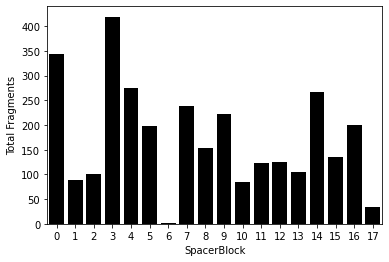

In [89]:
sns.barplot(data=barplotDF, x='SpacerBlock', y='Total Fragments', color='black')

In [90]:
desired_df[desired_df['SpacerBlock']==6]

,,SpacerBlock,Length,Start,End
SpacerBlock,,,,,
6,1422,6,5401,34359233,34364633


In [65]:
print("Mean: "+str(np.mean(desired_df['Length'])))
print("Median: "+str(np.median(desired_df['Length'])))

Mean: 3543.3471469556903
Median: 3554.0


In [73]:
print("Mean: "+str(np.mean(desired_df[desired_df['SpacerBlock']<18]['Length'])))
print("Median: "+str(np.median(desired_df[desired_df['SpacerBlock']<18]['Length'])))

Mean: 3564.836387013822
Median: 3554.0


(array([1.67e+02, 2.47e+02, 2.65e+03, 2.20e+01, 3.40e+01, 1.00e+00,
        4.00e+00, 0.00e+00, 5.00e+00, 0.00e+00, 0.00e+00, 1.00e+00,
        1.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
        2.00e+00, 0.00e+00, 1.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
        0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
        0.00e+00, 0.00e+00, 1.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
        0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
        0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
        0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
        0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
        0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
        0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
        0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
        0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
        0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 

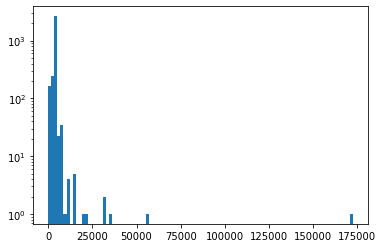

In [59]:
plt.hist(desired_df['Length'], log=True, bins=100)

(array([1.450e+02, 2.440e+02, 2.649e+03, 2.200e+01, 3.400e+01, 1.000e+00,
        4.000e+00, 0.000e+00, 5.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        2.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+0

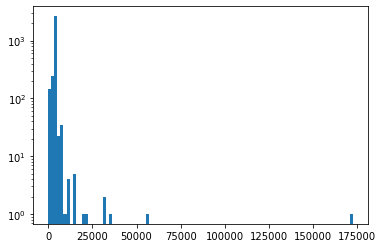

In [77]:
plt.hist(desired_df[desired_df['SpacerBlock']<18]['Length'], log=True, bins=100)